<a href="https://colab.research.google.com/github/alfinarhmdna/Python/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def odes(x,t):
  # parameters (PTI)
  r1 = (1/1000); # laju pertumbuhan jamur
  r2 = (0.00175); # laju produksi PAMPs tiap jamur
  r3 = (0.1); # laju PRRs dan PAMPS yang terlepas dari Z1
  r4 = (0.1875); # laju PRRs yang terdeaktivasi
  r5 = (0.0375); # laju PAMPs yang terdeaktivasi
  r6 = (0.015); # laju produksi MAPKs yang diinisiasi PTI
  K1 = (10000); # kapasitas lingkungan jamur
  sigma = (10); # laju ikatan PRRs dan PAMPs
  mu = (0.0075); # laju MAPKs yang terdeaktivasi (sama untuk PTI dan ETI)
  etha = (0.09375); # laju aktivasi PRRs di tanaman
  beta = (0.0075); # laju PR protein yang terdeaktivasi (sama untuk PTI dan ETI)
  gamma = (0.01); # laju penghambatan pertumbuhan jamur karena PTI
  epsilon = (0.1); # laju penghambatan produksi MAPKs karena ada efektor
  omega = (0.01)*0.4; # laju aktivasi PR protein di tanaman (sama untuk PTI dan ETI)

  # parameters (ETI)
  q2 = (0.00175); # laju produksi efektor tiap jamur
  q3 = (0.1); # laju efektor dan NB-LRR yang terlepas dari Z2
  q4 = (0.1875); # laju NB-LRR yang terdeaktivasi
  q5 = (0.0375); # laju efektor yang terdeaktivasi
  q6 = (0.015); # laju produksi MAPKs yang diinisiasi ETI
  lamda = (10); # # laju ikatan efektor dan NB-LRR
  alpha = (0.09375); # laju aktivasi NB-LRR di tanaman
  theta = (0.01); # laju pengurangan jamur yg dipengaruhi PR protein

  # assign each ODE to a vector element
  F = x[0] # jamur
  P1 = x[1] # PAMPs
  P2 = x[2] # PRRs
  Z1 = x[3] # kompleks PAMPs dan PRRs

  E = x[4] # efektor
  N = x[5] # NB-LRR
  Z2 = x[6] # kompleks efektor dan NB-LRR

  M = x[7] # MAPKs
  P3 = x[8] # PR protein

  # define each ODE
  dFdt = ((r1*F)/(1+(gamma*P3)))*(1-(F/K1)) - theta*P3;
  dP1dt = r2*F - (r5+sigma*P2)*P1 + (r3+r4)*Z1;
  dP2dt = etha - r4*P2 - sigma*P1*P2 + (r3+r5)*Z1;
  dZ1dt = (sigma*P1*P2)/(1+(epsilon*E)) - (r3+r4+r5)*Z1;

  dEdt = q2*F - (q5+lamda*N)*E + (q3+q4)*Z2;
  dNdt = alpha - q4*N - lamda*E*N + (q3+q5)*Z2;
  dZ2dt = lamda*E*N - (q3+q4+q5)*Z2;

  dMdt = r6*Z1 + q6*Z2 - mu*M;
  dP3dt = omega*M - beta*P3;

  return [dFdt,dP1dt,dP2dt,dZ1dt,dEdt,dNdt,dZ2dt,dMdt,dP3dt]

# initial conditions
x0 = [1, 0, 0.5, 0, 0, 0.5, 0, 0, 0]
# x0 = [9988, 463.6841378, 0.2039912061e-4, 0.6118628162e-2, 465.6595962, 0.3489430062e-4, 0.4999651057, 1.012167468, 0.5398226495]
# x0 = [20, 0.3137008431, 0.4568920081e-1, 0.4228664239, 0.4290003818, 0.3521123847e-1, 0.4647887615, 1.775310371, 0.9468321978]

# x0 = [9993, 650.5030893, 0.1454076758e-4, 0.6115408942e-2, 465.9132884, 0.3487530182e-4, 0.4999651247, 1.012161067, 0.5398192359]
# x0 = [7, 0.7557725591e-1, 0.1500584988, 0.3476077392, 0.3873334887e-1, 0.2281234879, 0.2718765121, 1.238968503, 0.6607832014]

# x0 = [9993, 463.9349965, 0.2042129531e-4, 0.5308611581e-2, 465.9136948, 0.3487527140e-4, 0.4999651247, 1.010547473, 0.5389586521]

# x0 = [20, 0, 0.5, 0, 0, 0.5, 0, 0, 0] # coba coba

# test the defined ODEs
print(odes(x=x0,t=0))

[0.0009999, 0.00175, 0.0, 0.0, 0.00175, 0.0, 0.0, 0.0, 0.0]


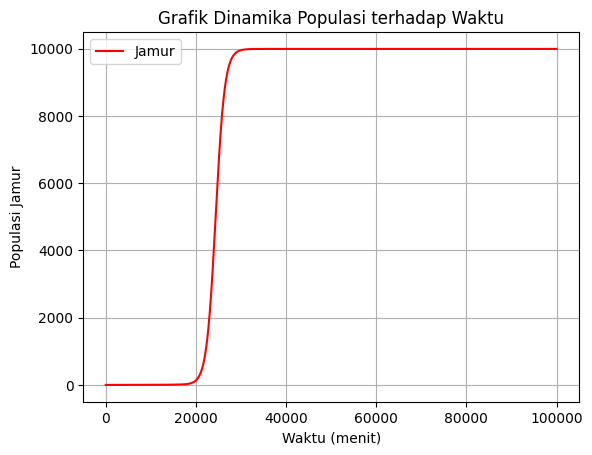

99993.9999399994 9994.569719135941


In [ ]:
# declare a time vector (time window)
t = np.linspace(0, 100000, 100000)
x = odeint(odes,x0,t)

F = x[:,0]
P1 = x[:,1]
P2 = x[:,2]
Z1 = x[:,3]

E = x[:,4]
N = x[:,5]
Z2 = x[:,6]

M = x[:,7]
P3 = x[:,8]

# plot the results
plt.plot(t,F, label='Jamur', color='r')
# plt.plot(t,P1, label='PAMPs', color='b')
# plt.plot(t,P2, label='PRRs', color='g')
# plt.plot(t,Z1, label='Kompleks PAMPs+PRRs', color='k')
# plt.plot(t,E, label='Efektor', color='y')
# plt.plot(t,N, label='NB-LRR', color='w')
# plt.plot(t,Z2, label='Kompleks Efektor+NB-LRR', color='c')
# plt.plot(t,M, label='MAPKs', color='m')
# plt.plot(t,P3, label='PR protein', color='o')
plt.legend()
plt.xlabel("Waktu (menit)")
plt.ylabel("Populasi Jamur")
plt.title("Grafik Dinamika Populasi terhadap Waktu")

# https://stackoverflow.com/questions/43374920/how-to-automatically-annotate-maximum-value-in-pyplot
# Di-modifikasi untuk menerima parameter ke-3 (x_pos) untuk posisi anotasi terhadap sumbu X
# dan ke-4 (y_pos) untuk posisi anotasi terhadap sumbu Y.
def annot_max(x,y,x_pos,y_pos, ax=None):
    xmax = x[np.argmax(y)]
    ymax = y.max()
    text= "Waktu={:.3f}, Populasi={:.6f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(x_pos,y_pos), **kw)

# Di-adaptasi dari sumber diatas
def annot_min(x,y,x_pos,y_pos, ax=None):
    xmin = x[np.argmin(y)]
    ymin = y.min()
    text= "Waktu={:.3f}, Populasi={:.6f}".format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmin, ymin), xytext=(x_pos,y_pos), **kw)

# annot_min(t,F, 0.95, 0.85)
# annot_max(t,F, 0.95, 0.65)

plt.grid()
plt.show()

# https://stackoverflow.com/questions/11871241/python-find-x-value-to-corresponding-max-y-value-in-plot
max_y = max(F)
max_x = t[F.argmax()]
print(max_x, max_y)

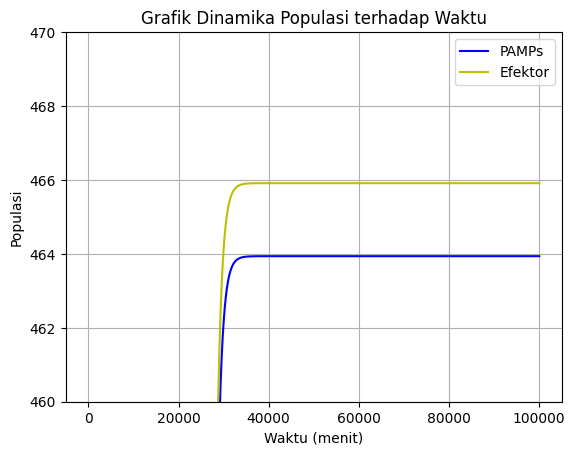

In [ ]:
# plot the results
# plt.plot(t,F, label='Jamur', color='r')
plt.plot(t,P1, label='PAMPs', color='b')
# plt.plot(t,P2, label='PRRs', color='g')
# plt.plot(t,Z1, label='Kompleks PAMPs+PRRs', color='k')
plt.plot(t,E, label='Efektor', color='y')
# plt.plot(t,N, label='NB-LRR', color='w')
# plt.plot(t,Z2, label='Kompleks Efektor+NB-LRR', color='c')
# plt.plot(t,M, label='MAPKs', color='m')
# plt.plot(t,P3, label='PR protein', color='o')
plt.legend()
plt.xlabel("Waktu (menit)")
plt.ylabel("Populasi")
plt.title("Grafik Dinamika Populasi terhadap Waktu")

# # annot_min(t,P1, 0.85, 0.2)
# annot_max(t,P1, 0.85, 0.2)
# # annot_min(t,E, 0.85, 0.25)
# annot_max(t,E, 0.85, 0.25)

plt.ylim(460, 470)
plt.grid()
plt.show()

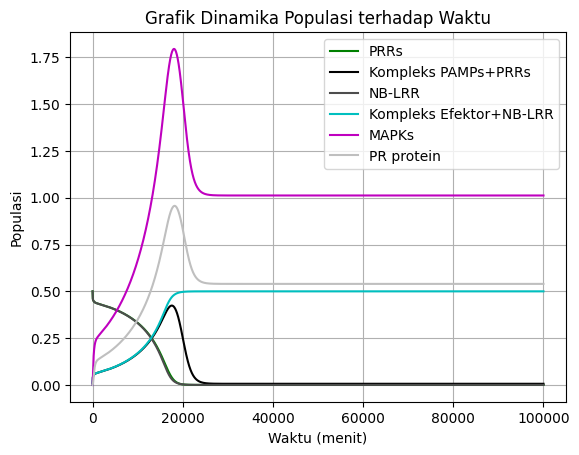

In [ ]:
# plot the results
# plt.plot(t,F, label='Jamur', color='r')
# plt.plot(t,P1, label='PAMPs', color='b')
plt.plot(t,P2, label='PRRs', color='g')
plt.plot(t,Z1, label='Kompleks PAMPs+PRRs', color='k')
# plt.plot(t,E, label='Efektor', color='y')
plt.plot(t,N, label='NB-LRR', color='0.3')
plt.plot(t,Z2, label='Kompleks Efektor+NB-LRR', color='c')
plt.plot(t,M, label='MAPKs', color='m')
plt.plot(t,P3, label='PR protein', color='0.75')
plt.legend(fontsize="10",loc="upper right")
plt.xlabel("Waktu (menit)")
plt.ylabel("Populasi")
plt.title("Grafik Dinamika Populasi terhadap Waktu")

# annot_max(t,P2, 0.95, 0.4)
# # annot_min(t,P2, 0.95, 0.2)

# annot_min(t,Z1, 0.95, 0.45)
# # annot_max(t,Z1, 0.95, 0.65)

# annot_max(t,N, 0.70, 0.85)
# # annot_min(t,N, 0.95, 0.85)

# annot_min(t,Z2, 0.95, 0.60)
# # annot_max(t,Z2, 0.95, 0.65)

# annot_min(t,M, 0.95, 0.95)
# # annot_max(t,M, 0.95, 0.65)

# annot_min(t,P3, 0.95, 0.50)
# # annot_max(t,P3, 0.95, 0.85)

# plt.ylim(0, 1.03)
plt.grid()
plt.show()